Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

    Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
    Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
    Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
    Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

Функция

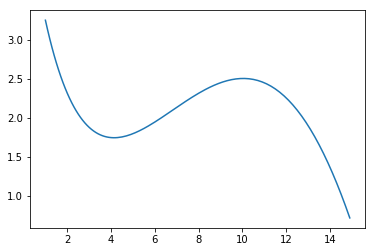

In [1]:
%matplotlib inline

import numpy as np
from numpy import sin, exp
import matplotlib.pyplot as plt

f = lambda x: sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

points = np.arange(1, 15, 0.1)

plt.plot(points, f(points))

Полином

In [2]:
def y(a, x):
    sum = 0
    for i in range(0, len(a)):
        sum = sum + a[i] * (x ** i)
    return sum

In [3]:
from scipy import linalg

Решение для полинома 1 степени

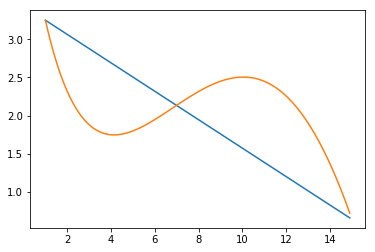

In [4]:
rank = 2
x = np.array([
    [1 ** n for n in range(0, rank)],
    [15 ** n for n in range(0, rank)]
])
b = np.array([f(1), f(15)])
w = linalg.solve(x, b)
plt.plot(points, y(w, points), points, f(points))

Решение для полинома 2 степени

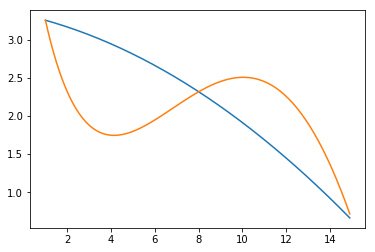

In [5]:
rank = 3
x = np.array([
    [1 ** n for n in range(0, rank)],
    [8 ** n for n in range(0, rank)],
    [15 ** n for n in range(0, rank)]
])
b = np.array([f(1), f(8), f(15)])
w = linalg.solve(x, b)
plt.plot(points, y(w, points), points, f(points))

Для полинома 3 степени

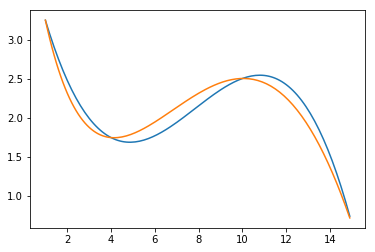

In [6]:
rank = 4
x = np.array([
    [1 ** n for n in range(0, rank)],
    [4 ** n for n in range(0, rank)],
    [10 ** n for n in range(0, rank)],
    [15 ** n for n in range(0, rank)]
])
b = np.array([f(1), f(4), f(10), f(15)])
w = linalg.solve(x, b)
plt.plot(points, y(w, points), points, f(points))

Сохраняем результат

In [7]:
f = open("submit_2.txt", "w")
f.write(str(w[0]) + " " + str(w[1]) + " " + str(w[2]) + " " + str(w[3]))
f.close()

In [8]:
!more submit_2.txt

4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332
